# **MODEL FOR SELECTING FOOTBALL PLAYERS**
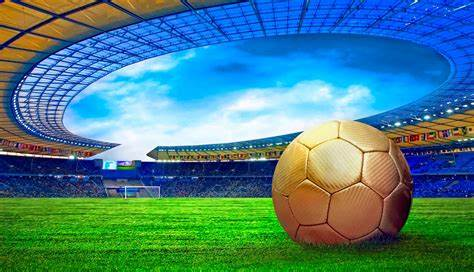

Predict Player Performance by apply Machine Learning Model
Done by: ALIYA P SUBEER
The goal of the project aims to apply Data Science technologies and machine learning algorithms to predict player football performance by using "player_Attributes"

# **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **UPLOAD DATASET**

In [85]:
from google.colab import drive
drive.mount('/content/drive')
data_train = pd.read_csv(r'/content/train (1).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Save dataset to another variable**

In [86]:
data=data_train

In [5]:
data_train.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


# **BASIC DATA DESCRIPTION**

**Show the number of rows and columns**

In [6]:
data_train.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [7]:
data_train.shape

(13994, 30)

In [8]:
data_train.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


## **EDA**

In [9]:
corr = data_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000000,0.083226,-0.008863,-0.057670,0.143558,0.123803,0.314631,0.077189,0.156910,0.153986,0.021298,0.149276,0.201067,-0.131127,0.373710,0.211322,0.079287,0.031321,0.841174,-0.010648,-0.161858
ball_controlling_skills,0.083226,1.000000,0.702451,0.603590,0.204900,0.769665,0.698116,-0.788039,0.599675,0.896749,0.935523,0.896938,0.552414,0.685486,0.456825,0.213193,0.724426,0.271955,0.092147,-0.007704,0.266491
body_reflexes,-0.008863,0.702451,1.000000,0.760907,0.225810,0.564346,0.450446,-0.537320,0.296905,0.672426,0.764390,0.656593,0.275718,0.797895,0.283540,0.087777,0.571632,0.236306,-0.020540,-0.015511,0.162903
body_balance,-0.057670,0.603590,0.760907,1.000000,0.201172,0.486471,0.337687,-0.520488,0.289356,0.584480,0.664494,0.541877,0.129391,0.687482,0.159227,0.041408,0.482731,0.197795,-0.074671,-0.012731,0.100898
jumping_skills,0.143558,0.204900,0.225810,0.201172,1.000000,0.135705,0.264315,-0.204789,0.326436,0.157543,0.151524,0.186959,0.404124,0.245175,0.267306,0.112615,0.363427,0.056760,0.156122,-0.010994,0.085277
penalties_conversion_rate,0.123803,0.769665,0.564346,0.486471,0.135705,1.000000,0.568721,-0.631879,0.305723,0.691159,0.773353,0.873006,0.391848,0.542965,0.353688,0.212820,0.518531,0.248151,0.142095,-0.012323,0.177305
mental_strength,0.314631,0.698116,0.450446,0.337687,0.264315,0.568721,1.000000,-0.423501,0.521529,0.712112,0.621144,0.684802,0.528807,0.384256,0.665164,0.363217,0.544183,0.227516,0.368217,-0.002148,0.319026
goalkeeping_skills,0.077189,-0.788039,-0.537320,-0.520488,-0.204789,-0.631879,-0.423501,1.000000,-0.660254,-0.661463,-0.760564,-0.717514,-0.546024,-0.625644,-0.078789,-0.004823,-0.704367,-0.176665,0.098214,0.013678,-0.047467
defending_skills,0.156910,0.599675,0.296905,0.289356,0.326436,0.305723,0.521529,-0.660254,1.000000,0.636592,0.491838,0.464936,0.680394,0.335472,0.390215,0.157260,0.699844,0.100340,0.178304,0.001202,0.153933
passing_skills,0.153986,0.896749,0.672426,0.584480,0.157543,0.691159,0.712112,-0.661463,0.636592,1.000000,0.870070,0.849184,0.501256,0.595467,0.512608,0.254732,0.685628,0.265326,0.178630,-0.008077,0.257658


highly correlated values are near to 1 and low  correlated values are clos to -1.passing_skills	dribbling_skills	shot_accuracy these all are highly correlated to selection.

In [87]:
X = data.drop(['player_id', 'name', 'gender', 'country'],axis=1)
Y=data['selection']

In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Create instances of the encoders
onehot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

# Label encode the strong_foot, dedication_level, and coaching columns
X['strong_foot'] = label_encoder.fit_transform(X['strong_foot'])
X['dedication_level'] = label_encoder.fit_transform(X['dedication_level'])
X['coaching'] = label_encoder.fit_transform(X['coaching'])
X.head()

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,3,7.7,NaN,8.1,2.0,0,2,8.0,0.0,1
1,18,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,0,5.3,0.0,NaN,3.0,2,1,3.0,0.0,0
2,16,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,1,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1
3,27,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,3,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1
4,19,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,3,NaN,0.0,5.7,5.0,2,0,4.0,0.0,0


In [89]:
import pandas as pd

# Define the custom function
def feet_inches_to_inches(height):
    # Split the height string into feet and inches
    feet, inches = height.split("'")

    # Convert the feet and inches to integers
    feet = int(feet)
    inches = int(inches.strip('"'))

    # Calculate the total height in inches
    total_inches = (feet * 12) + inches

    return total_inches

# Create some sample data
data = pd.DataFrame(X)

# Apply the custom function to the height column
X['height_inches'] = X['height'].apply(feet_inches_to_inches)

# Print the resulting data frame
data.head()


,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_inches
0,23,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,7.7,NaN,8.1,2.0,0,2,8.0,0.0,1,74
1,18,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,5.3,0.0,NaN,3.0,2,1,3.0,0.0,0,70
2,16,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1,74
3,27,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1,71
4,19,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,NaN,0.0,5.7,5.0,2,0,4.0,0.0,0,68


In [39]:
data.dtypes

age                            int64
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int64
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int64
coaching                       int64
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
height_inches                  int64
d

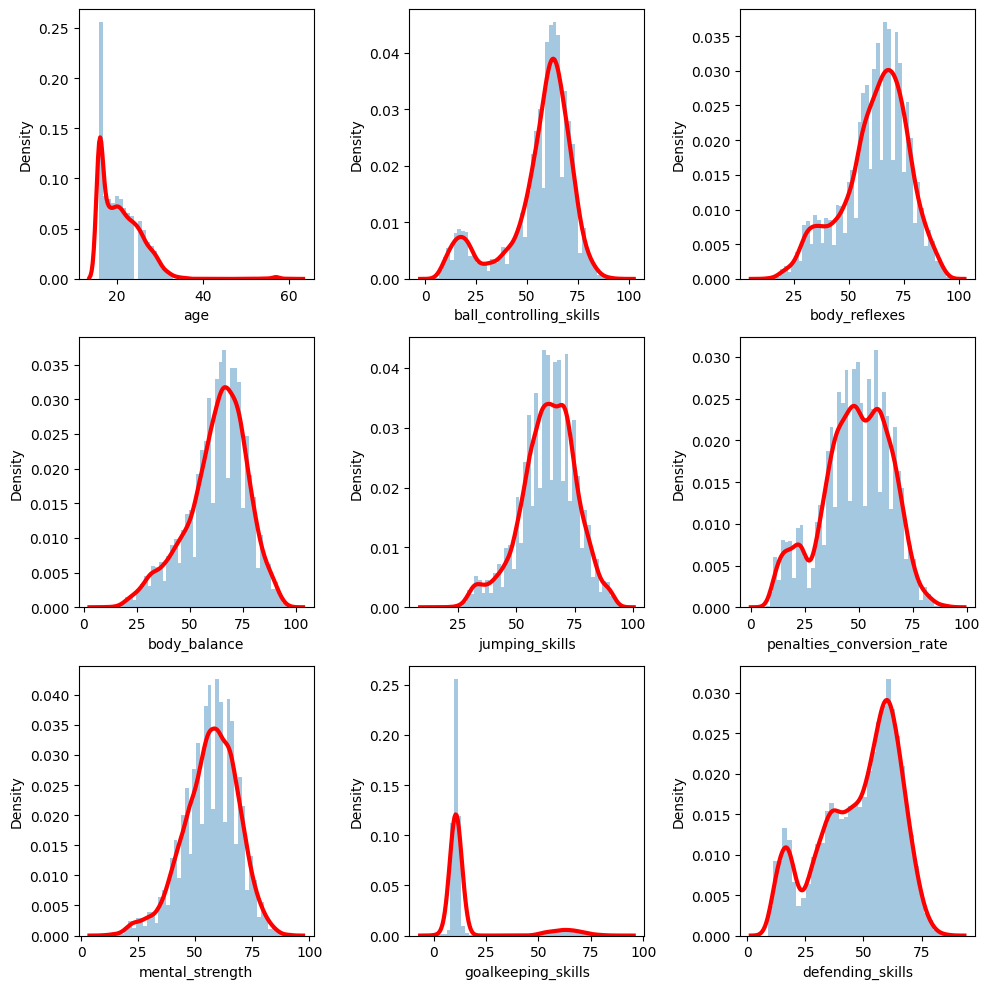

In [53]:
rows=3
cols=3
data = data.drop(columns=['weight', 'height'])
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,"color":"red"})
        index=index+1
plt.tight_layout()
plt.show()

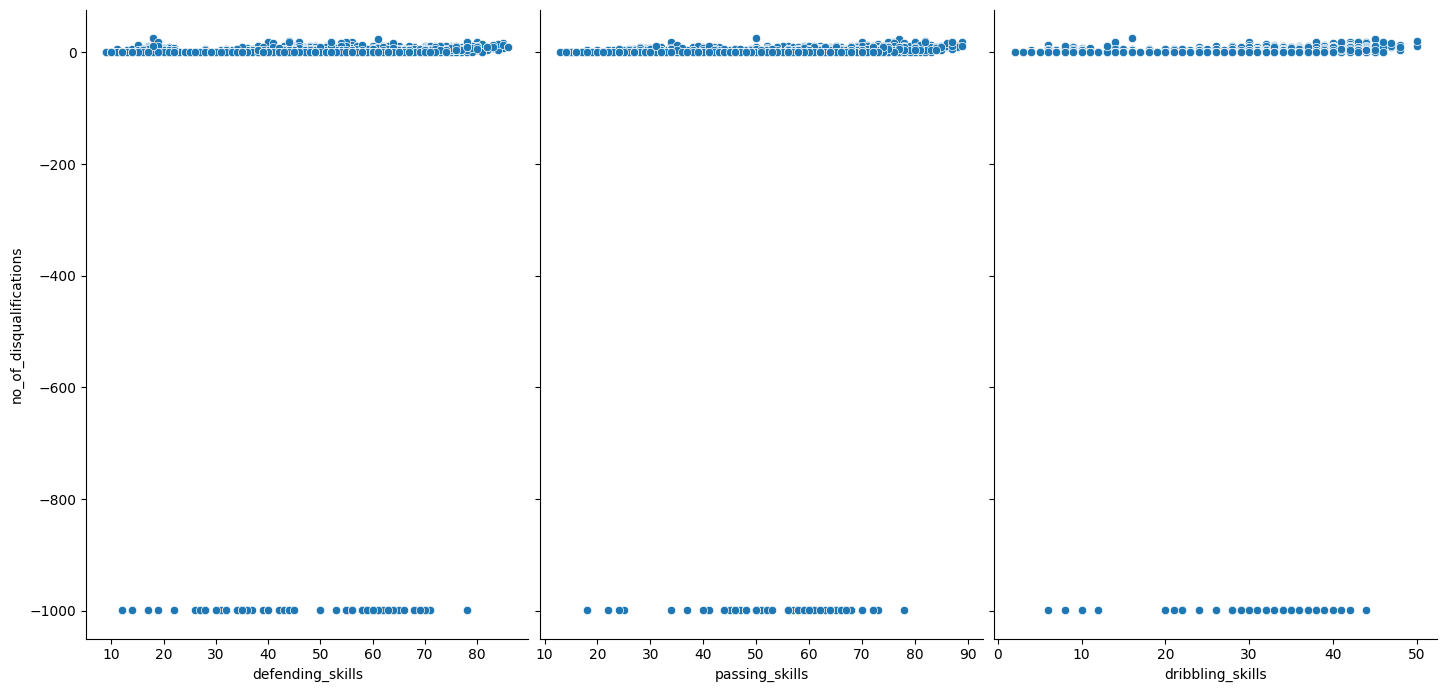

In [54]:
import seaborn as sns
sns.pairplot(data, x_vars=['defending_skills','passing_skills','dribbling_skills'], y_vars='no_of_disqualifications', size=7, aspect=0.7)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ball_controlling_skills'}>,
        <Axes: title={'center': 'body_reflexes'}>,
        <Axes: title={'center': 'body_balance'}>,
        <Axes: title={'center': 'jumping_skills'}>],
       [<Axes: title={'center': 'penalties_conversion_rate'}>,
        <Axes: title={'center': 'mental_strength'}>,
        <Axes: title={'center': 'goalkeeping_skills'}>,
        <Axes: title={'center': 'defending_skills'}>,
        <Axes: title={'center': 'passing_skills'}>],
       [<Axes: title={'center': 'dribbling_skills'}>,
        <Axes: title={'center': 'shot_accuracy'}>,
        <Axes: title={'center': 'body_strength_stamina'}>,
        <Axes: title={'center': 'max_running_speed'}>,
        <Axes: title={'center': 'strong_foot'}>],
       [<Axes: title={'center': 'behaviour_rating'}>,
        <Axes: title={'center': 'matches_played'}>,
        <Axes: title={'center': 'fitness_rating'}>,
        <Axes: title={'center': 'troph

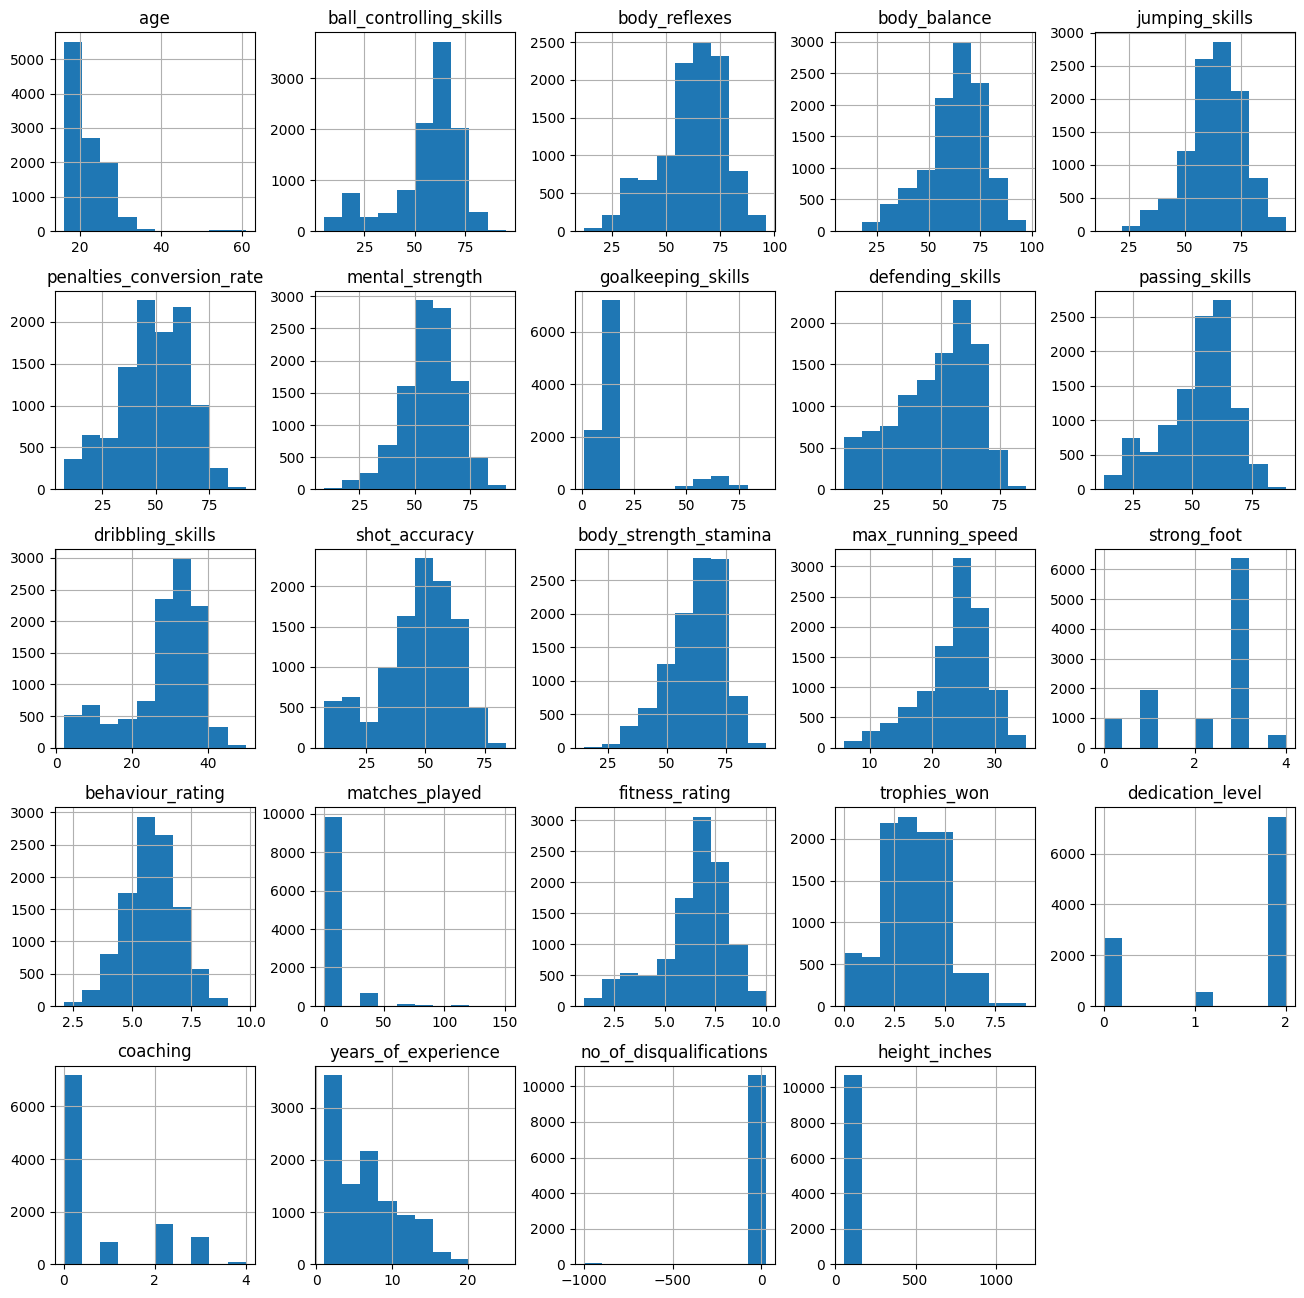

In [121]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
dataset_scaled = scaler.fit_transform(X)
X.hist(figsize = (16,16))

Text(0, 0.5, 'years of experience')

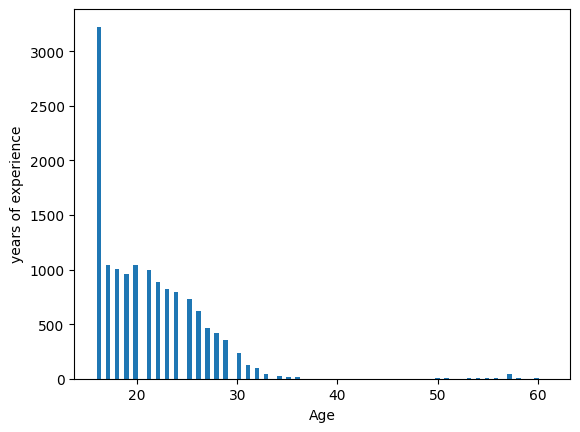

In [55]:
plt.hist(data.age, bins=100)
plt.xlabel("Age")
plt.ylabel("years of experience")

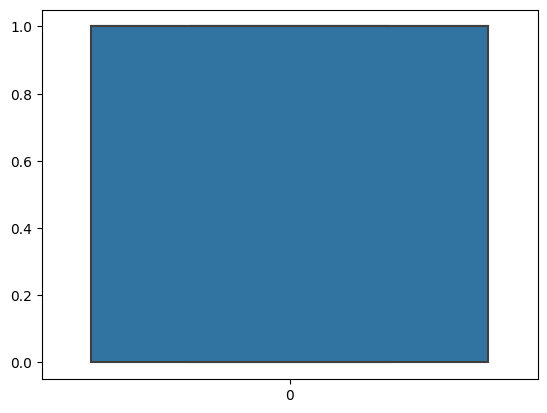

In [56]:
sns.boxplot(data["selection"])
pd.options.mode.chained_assignment = None

[0 1 2 3 4]


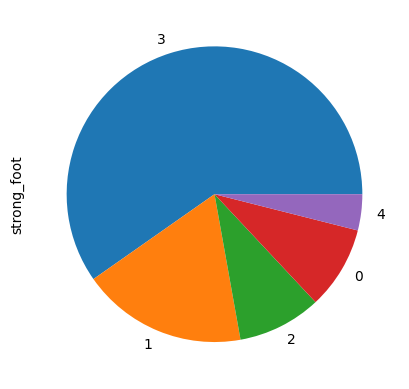

In [57]:
labelencoder = LabelEncoder()
data_train['strong_foot'].value_counts().plot(kind='pie')
labelencoder.fit(data_train['strong_foot'])
print(labelencoder.classes_)

<Axes: ylabel='years_of_experience'>

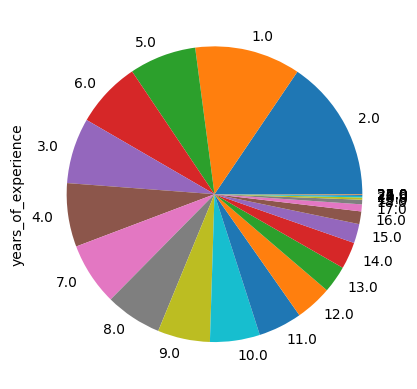

In [58]:
data["years_of_experience"].value_counts().plot(kind='pie')

<Axes: xlabel='age', ylabel='selection'>

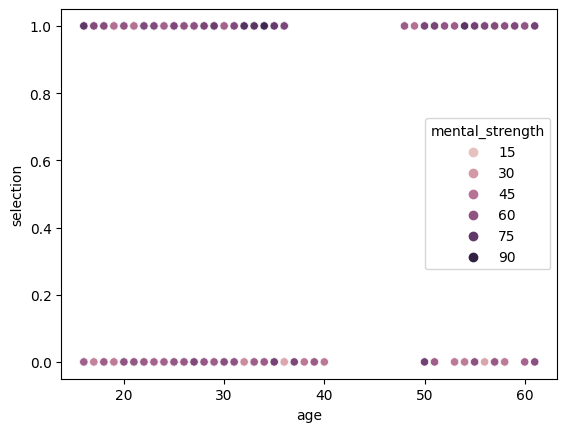

In [59]:
sns.scatterplot(data=data_train, x="age", y="selection", hue="mental_strength")

<Axes: xlabel='selection', ylabel='Density'>

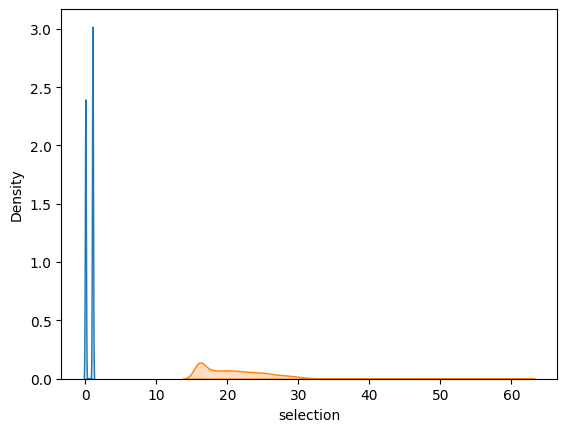

In [60]:
ax = sns.kdeplot(data_train["selection"], shade=True)
sns.kdeplot(data_train["age"], shade=True)

from the eda we can understand that more selection take place in average mental strength age between 25 to 40.most selected playesrs are right footed.2 years experience are more selected.

# **MISSING VALUE HANDLING AND OUTLIER DETECTION**

In [90]:
# Calculate the IQR
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data1 = data[~((data< lower_bound) | (data > upper_bound)).any(axis=1)]


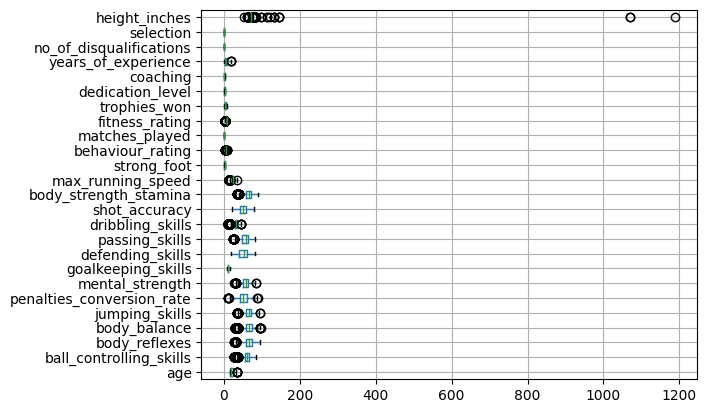

In [91]:
data1.boxplot(vert=False)

# Show the plot
plt.show()

In [92]:
data = data.dropna(axis=0)

In [93]:
data.isna().sum()

age                          0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
height_inches                0
dtype: int64

In [83]:
data.dropna(how='all', inplace=True)


In [99]:
X = data.drop(['selection', 'height', 'weight'], axis=1)

# Assign the selection column to variable Y
Y = data['selection']

# Print the shapes of X and Y
print('Shape of X: ', X.shape, ' shape of Y: ', Y.shape)

Shape of X:  (10696, 24)  shape of Y:  (10696,)


[0.06808408 0.07295651 0.03016098 0.02867245 0.03055836 0.03104539
 0.05707849 0.0425822  0.06303055 0.04920462 0.06046909 0.04601601
 0.0310958  0.03134816 0.02113441 0.08886601 0.02867567 0.03082263
 0.0259222  0.01359459 0.01755527 0.09917533 0.00392175 0.02802943]


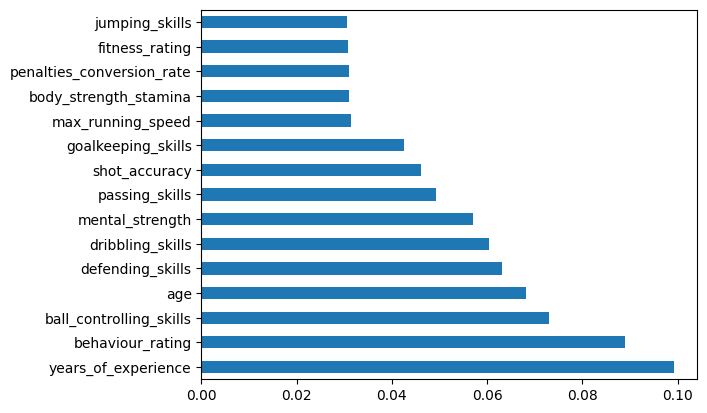

In [100]:
#Use a features selection technique to select those features in
#your data that contribute most to the prediction.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('shape of X_train:',X_train.shape,'shape of X_test:',X_test.shape,'shape of y_train:',Y_train.shape,'shape of y_test:',Y_test.shape )


shape of X_train: (8556, 24) shape of X_test: (2140, 24) shape of y_train: (8556,) shape of y_test: (2140,)


In [102]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
pred = linear.predict(X_test)
accuracy_score_LR= linear.score(X_test,Y_test)
accuracy_score_LR

0.35022310323098516

In [103]:
print(linear.intercept_)
print(linear.coef_)

-1.1151023619658305
[-2.28840774e-03  9.83616896e-03 -7.89825858e-04 -1.74891861e-03
  1.51548096e-03  2.22756439e-03  8.31915718e-03  1.30783633e-02
  5.82084237e-03 -1.82589603e-03 -5.37386245e-04  1.31713343e-03
  6.68973986e-04  1.36498349e-03 -5.75743566e-03  1.24111554e-01
  1.66900779e-03 -3.65470860e-02  5.69469525e-03 -1.09812048e-02
  3.94635499e-03 -5.51594898e-02 -2.38794825e-05 -2.17341824e-05]


In [104]:

from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,pred))

0.34788632396510083


In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [106]:

pipeline.fit(np.array(X_train), Y_train)
y_pred=pipeline.predict(X_test)

In [107]:
accuracy_score = pipeline.score(X_train,Y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.5214824837264228


In [108]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
log_model = LogisticRegression()

# Train the model on the training data
log_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, Y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [ ]:
#FEATURE SELECTION

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Scale the data to a range where all values are non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with chi2 scoring function
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X_scaled, Y)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)


Selected features: Index(['ball_controlling_skills', 'passing_skills', 'behaviour_rating',
       'matches_played', 'years_of_experience'],
      dtype='object')


In [111]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
decision_model = DecisionTreeClassifier()

# Train the model on the training data
decision_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = decision_model.predict(X_test)

# Evaluate the model's performance
accuracy1 = decision_model.score(X_test, Y_test)
print('Accuracy:', accuracy1)

Accuracy: 0.7981308411214953


In [112]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create a random forest classifier
random_model = RandomForestClassifier()

# Train the model on the training data
random_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = random_model.predict(X_test)

# Evaluate the model's performance
accuracy2 = random_model.score(X_test, Y_test)
print('Accuracy:', accuracy2)

Accuracy: 0.8635514018691589


In [113]:
pipeline = make_pipeline(PolynomialFeatures(2), RandomForestClassifier())
pipeline.fit(np.array(X_train), Y_train)
y_pred=pipeline.predict(X_test)
accuracy_score_RFPIPELINE = pipeline.score(X_train,Y_train)
print('Model Accuracy: ', accuracy_score_RFPIPELINE)

Model Accuracy:  1.0


In [114]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


# Create a gradient boosting classifier
grad_model = GradientBoostingClassifier()

# Train the model on the training data
grad_model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = grad_model.predict(X_test)

# Evaluate the model's performance
accuracy3 = grad_model.score(X_test, Y_test)
print('Accuracy:', accuracy3)

Accuracy: 0.8560747663551402


In [123]:
row_names = ['Algorithm', 'Accuracy']
alg = ["LINEAR", "RANDOMFOREST", "DECISIONTREE", "GRADIENTBOOSTIONG",'RANDOMFORESTPIPELINING']
comp = [accuracy_score_LR, accuracy2, accuracy1, accuracy3,accuracy_score_RFPIPELINE]
d = {}
for i in range(0, 5):
    d[i] = [alg[i], comp[i]]
table = pd.DataFrame(d, index=row_names)
print(table)


                  0             1             2                  3  \
Algorithm    LINEAR  RANDOMFOREST  DECISIONTREE  GRADIENTBOOSTIONG   
Accuracy   0.350223      0.863551      0.798131           0.856075   

                                4  
Algorithm  RANDOMFORESTPIPELINING  
Accuracy                      1.0  


RANDOM FOREST HAS HIGHEST ACCURACY